In [1]:
# Ex 15.17 Binary Classification with the Breast Cancer Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [2]:
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
print("Samples:", X.shape[0], " Features:", X.shape[1])
print("Targets:", np.unique(y), "=>", breast_cancer.target_names)


Samples: 569  Features: 30
Targets: [0 1] => ['malignant' 'benign']


In [3]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (569, 30)
Shape of y: (569,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)


Training set size: (455, 30) (455,)
Testing set size: (114, 30) (114,)


In [5]:
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [6]:
y_pred = nb.predict(X_test)
print("Estimator .score (GaussianNB test set):", nb.score(X_test, y_test))


Estimator .score (GaussianNB test set): 0.9385964912280702


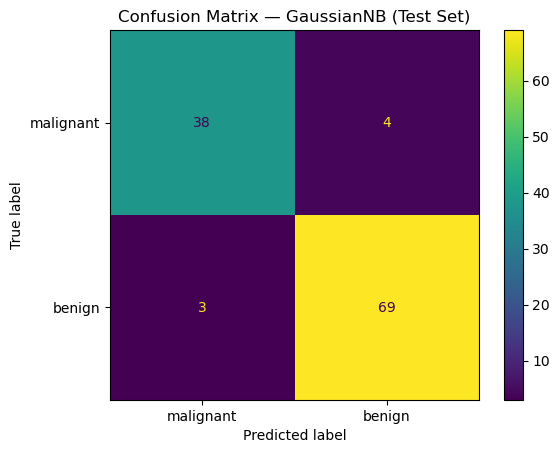

In [7]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast_cancer.target_names)
disp.plot(values_format="d")
plt.title("Confusion Matrix — GaussianNB (Test Set)")
plt.show()


In [8]:
print(classification_report(y_test, y_pred, target_names=breast_cancer.target_names))


              precision    recall  f1-score   support

   malignant       0.93      0.90      0.92        42
      benign       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [13]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=nb, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
print("GaussianNB 10-Fold CV scores:", scores)
print("Mean accuracy:", scores.mean(), "Std:", scores.std())  


GaussianNB 10-Fold CV scores: [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
Mean accuracy: 0.9384711779448622 Std: 0.02750305414538902


In [14]:
estimators = {
    "GaussianNB": GaussianNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(solver="lbfgs", multi_class="ovr", max_iter=10000),
    "SVC": SVC(gamma="scale"),
}

results = []
for name, model in estimators.items():
    scores = cross_val_score(model, X, y, cv=kfold)
    results.append({
        "Model": name,
        "CV Mean Accuracy": scores.mean(),
        "CV Std": scores.std(),
        "Min": scores.min(),
        "Max": scores.max()
    })

df_results = pd.DataFrame(results).sort_values("CV Mean Accuracy", ascending=False)
print(df_results)


/Users/abishekkc/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/abishekkc/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/abishekkc/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/abishekkc/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "/Users/abishekkc/anaconda3/lib/python3.11/site-packages/skl

                  Model  CV Mean Accuracy    CV Std       Min       Max
2    LogisticRegression          0.952569  0.027208  0.912281  1.000000
0            GaussianNB          0.938471  0.027503  0.894737  0.964912
3                   SVC          0.919173  0.035227  0.859649  0.964912
1  KNeighborsClassifier               NaN       NaN       NaN       NaN
